In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
import yfinance as yf

In [ ]:
!pip install yfinance

In [ ]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [ ]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [ ]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153320,2024.673828,1513.858521,982.032654,246.232254,1140.846313,645.737183
2018-10-03 00:00:00+05:30,1171.299561,1941.463013,1492.242432,979.958069,244.657639,1138.423950,630.040222
2018-10-04 00:00:00+05:30,1090.773071,1853.448853,1450.853882,944.545166,237.944427,1149.803955,611.619080
2018-10-05 00:00:00+05:30,1019.432007,1887.424438,1436.658569,948.187744,229.159302,1121.924927,626.667358
2018-10-08 00:00:00+05:30,1078.283569,1864.894043,1437.395996,938.393738,226.424286,1110.910522,617.889160
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3577.149902,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3585.699951,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3589.300049,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


In [ ]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [ ]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006415,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046394,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [ ]:
log_returns = log_returns[1:]

In [ ]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [ ]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238601
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283981
INFY.NS          0.292504
dtype: float64


In [ ]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [ ]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [ ]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [ ]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [ ]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.145620,0.206011,0.706855
1,0.156097,0.200076,0.780187
2,0.130868,0.189406,0.690941
3,0.127668,0.178932,0.713502
4,0.126897,0.182554,0.695121
...,...,...,...
9995,0.131945,0.183101,0.720612
9996,0.136236,0.183753,0.741410
9997,0.134297,0.182332,0.736555
9998,0.121400,0.191034,0.635491


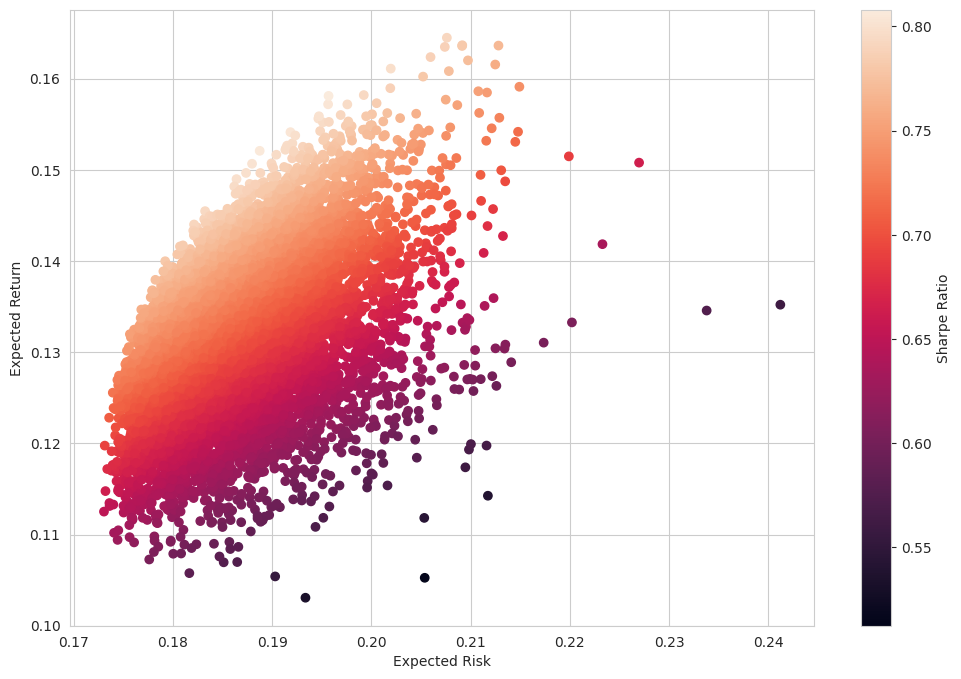

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [ ]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [ ]:
sharpe_ratios[ind]

0.8079380012566708

In [ ]:
portfolio_returns[ind]

0.1581095858823824